<a href="https://colab.research.google.com/github/fellipe753/Deteccao_fraude_cc/blob/main/Trabalho_Detec%C3%A7%C3%A3o_de_Fraude_Cartoes_de_Credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito

Neste projeto será abordado o problema das fraudes em cartões de crédito de uma instituição financeira (banco ou fintech), dados estes que foram obtidos via [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?datasetId=310&sortBy=voteCount).

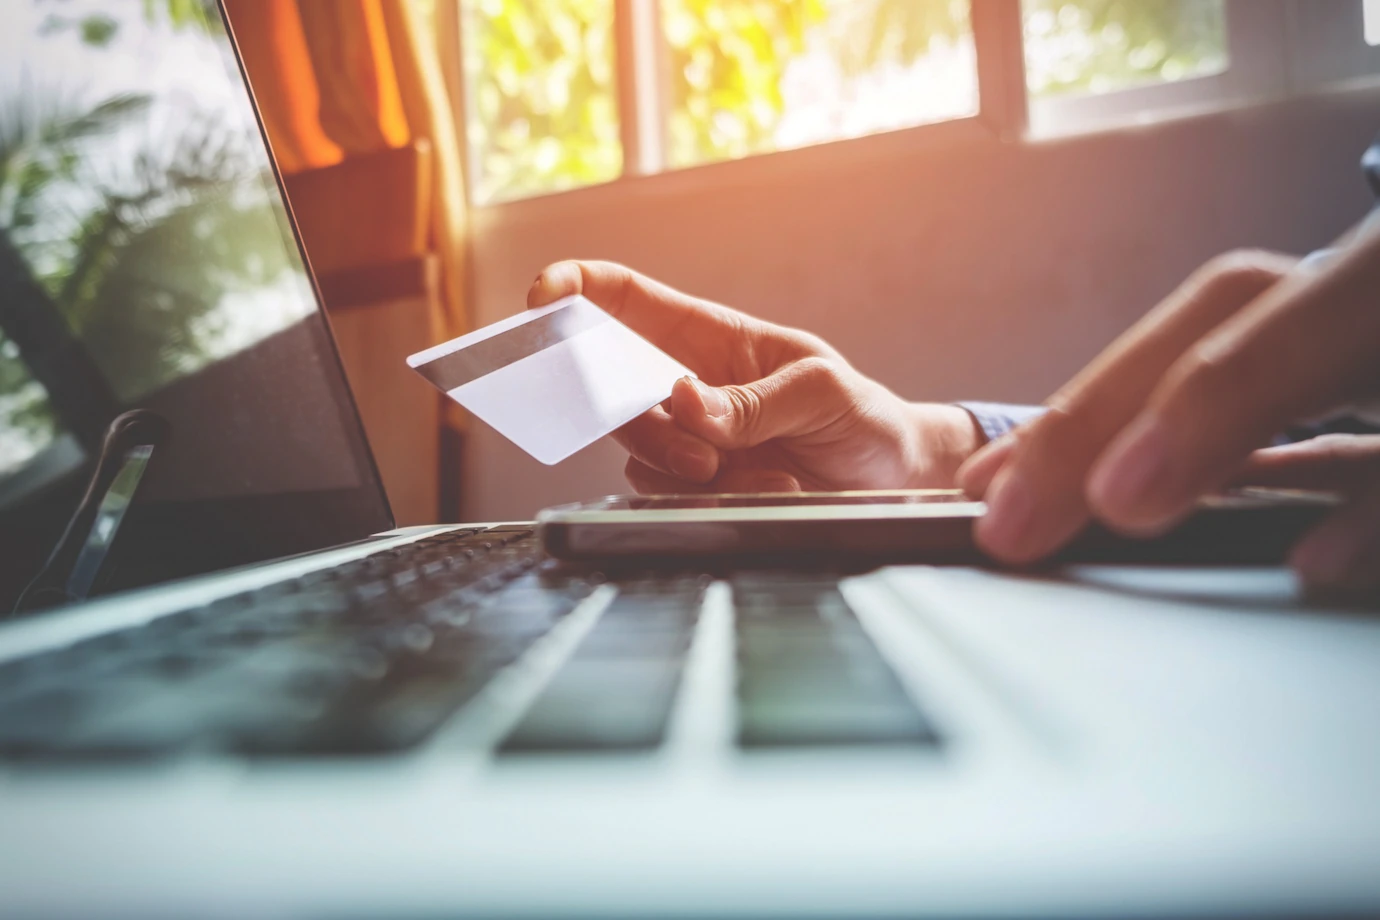

Segundo a Associação Brasileira das Empresas de Cartões de Crédito (ABECS) mais de [R$ 1 trilhão](https://blogbr.clear.sale/fraude-cartao-de-credito-principais-tipos-e-como-proteger-seu-varejo) em transações foram feitas utilizando cartões de créditos no Brasil em 2019, tornando este cenário atrativo para fraudadores.

Também em 2019, foi reportado pela Confederação Nacional de Dirigentes Lojistas (CNDL) e pelo Serviço de Proteção ao Crédito (SPC Brasil) que fraudes financeiras deram um prejuízo de [R$ 1,8 bilhão](https://extra.globo.com/economia-e-financas/fraudes-financeiras-geraram-um-prejuizo-de-cerca-de-18-bilhao-em-12-meses-23908141.html) no ano.

Dentro destas fraudes, as fraudes envolvendo cartões de crédito possuem uma alta relevância, gerando prejuízo para os consumidores e para as instituições financeiras.

Com a crescente das fraudes em cartões de crédito, temos também o problema dos falsos positivos, ou seja, compras não fraudulentas que foram impedidas de serem concluídas devido a suspeita de uma fraude e que em alguns casos podem gerar bloqueio do cartão.

Por estes motivos e pelo meu interesse em data science, apresento este trabalho que utiliza de técnicas de aprendizado de máquina para detectar transações fraudulentas.



Para mais projetos feitos por mim, favor acessar o meu [github](https://github.com/fellipe753/portfolio) ou o meu [linkedin](https://www.linkedin.com/in/fellipe-oliveira/).

# 1 - Import e Análise do dataset

## 1.1 - Imports

In [ ]:
#@title
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install -q scikit-plot
import scikitplot as skplt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler  
from imblearn.over_sampling import RandomOverSampler 
from sklearn.tree import DecisionTreeClassifier

## 1.2 - Leitura do Dataset

In [ ]:
#@title
df = pd.read_csv("https://www.dropbox.com/s/ztwen3072mzwgvf/creditcard.csv?dl=1")

print(f'Variáveis do dataset: {df.shape[1]}\nTotal de linhas do dastaset: {df.shape[0]}\n')
df.head()

Variáveis do dataset: 31
Total de linhas do dastaset: 284807



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 1.3 Divisão do dataset em treino e teste

15% do dataset original é utilizado como dados de teste para validação do modelo escolhido ao final das análises.

In [ ]:
#@title
print("Dimensões do dataset original: ", df.shape)

#criando dataset de validação com 15% do total
df_teste = df.sample(frac=0.15, random_state=0)

df = df.drop(df_teste.index) #treino

print("Dimensões do dataset de teste: ", df_teste.shape)
print("Dimensões do dataset de treino: ", df.shape)

Dimensões do dataset original:  (284807, 31)
Dimensões do dataset de teste:  (42721, 31)
Dimensões do dataset de treino:  (242086, 31)


In [ ]:
#@title
# verificando os tipos das variáveis
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

##1.4 - Análise Variáveis e Nulos

Não foram encontrados valores nulos para nenhuma entrada.

Aqui descrevemos as variáveis `Amount` (valor da transação) e `Time` (tempo em segundos para concluir a transação).

É interessante notar que temos `Amount` com valor zero, ou seja, uma compra sem valor. 

    A variável Amount possui 1825 entradas com valor zero, sendo 1798 transações normais e 27 fraudes.
    A variável Time possui 2 entradas com valor zero, sendo 2 transações normais e 0 fraudes.

Na primeira versão do código, eu havia removido todos os valores = 0. Entretanto, quando comparei com os resultados sem a remoção, notei que não remover estes valores melhorava os resultados, visto que 27 transações fraudulentas se encontravam nesse grupo, algo em torno de 8% de todas as fraudes.

Desta forma, nesta versão não removo os valores zerados. A precisão para detectar fraudes aumentou 3%.

In [ ]:
#@title
#verificando quantidade de nulos
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#@title
#podemos observar que o minimo em ambos os casos são zero
df[['Amount','Time']].describe()

,Amount,Time
count,242086.000000,242086.000000
mean,88.612429,94857.597379
std,247.655020,47490.660832
min,0.000000,0.000000
25%,5.662500,54234.000000
50%,22.000000,84747.000000
75%,77.580000,139362.000000
max,19656.530000,172792.000000


In [ ]:
#@title
print(f'A variável Amount possui {len(df[df.Amount==0])} entradas com valor zero, sendo {(len(df[df.Amount==0]))-(df.Class[df.Amount==0].sum())} transações normais e {df.Class[df.Amount==0].sum()} fraudes.')
print(f'A variável Time possui {len(df[df.Time==0])} entradas com valor zero, sendo {(len(df[df.Time==0]))-(df.Class[df.Time==0].sum())} transações normais e {df.Class[df.Time==0].sum()} fraudes.')

A variável Amount possui 1559 entradas com valor zero, sendo 1533 transações normais e 26 fraudes.
A variável Time possui 2 entradas com valor zero, sendo 2 transações normais e 0 fraudes.


In [ ]:
#@title
# # remoção das entradas zeradas, nesta versão eu optei por manter os valores zerados
# print(f'Total de entradas do dataset antes da limpeza: {len(df)}.')

# df.drop(df[df.Amount==0].index, inplace=True, axis=0)
# df.drop(df[df.Time==0].index, inplace=True, axis=0)

# print(f'Total de entradas do dataset após a limpeza: {len(df)}.')

## 1.5 Gráficos

Abaixo é ilustrado a distribuição de transações normais e fraudulentas.

As transações fraudulentas representam apenas 0.1727% dos registros do dataset.


### a - Distribuição das Classes

Fraudes representam apenas 0.1727% do dataset.



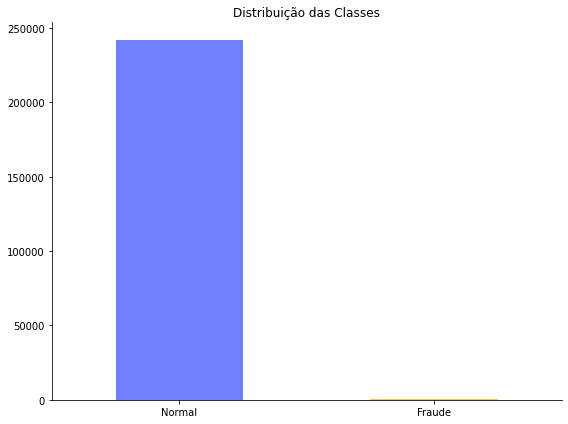

In [ ]:
#@title
print(f'Fraudes representam apenas {round(((df.Class==1).sum()/df.Class.shape[0])*100,4)}% do dataset.\n')

cores = ['#7081FF','#F0CC51']
fig, ax = plt.subplots(figsize=(8,6))

df.Class.value_counts().plot(kind='bar', ax=ax, color=cores) #ou> sns.countplot('Class', data=df, ax=ax, palette=cores);

ax.set_title('Distribuição das Classes')
ax.set_ylabel('')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xticks([0, 1], ['Normal', 'Fraude'],rotation='horizontal')

plt.tight_layout()
plt.show()

### b - Histograma Tempo das Transações
Aqui é apresentado um histograma que ilustra quantas transações foram feitas em certo tempo (em segundos) para transações normais e fraudulentas.

Para transações normais temos duas áreas de concentração do tempo das transações. Já para as trasações fraudulentas, não existe um padrão tão claro como nas transações normais.

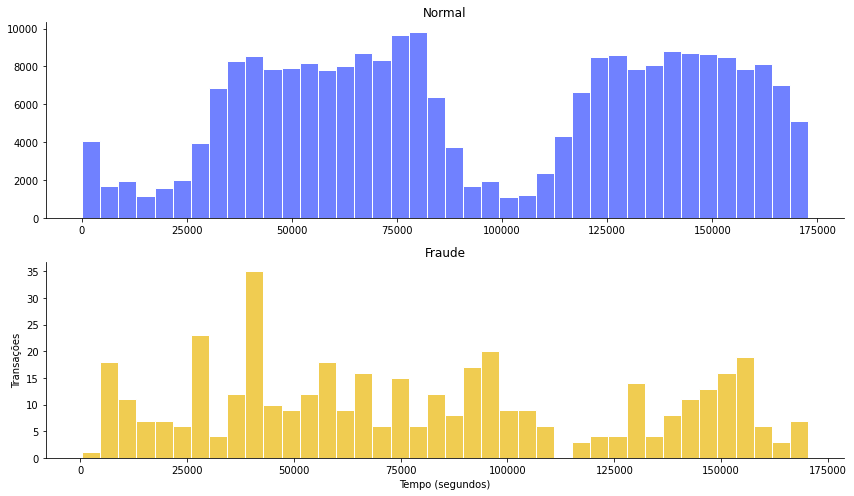

In [ ]:
#@title
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,7))
num_bins = 40

ax[0].hist(df.Time[df.Class == 0], bins=num_bins, color='#7081FF', ec = 'w')
ax[0].set_title('Normal')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[1].hist(df.Time[df.Class == 1], bins=num_bins, color='#F0CC51', ec = 'w')
ax[1].set_title('Fraude')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()

### c - Boxplot Amount das Transações

Aqui é ilustrado os valores das transações normais e fraudulentas.

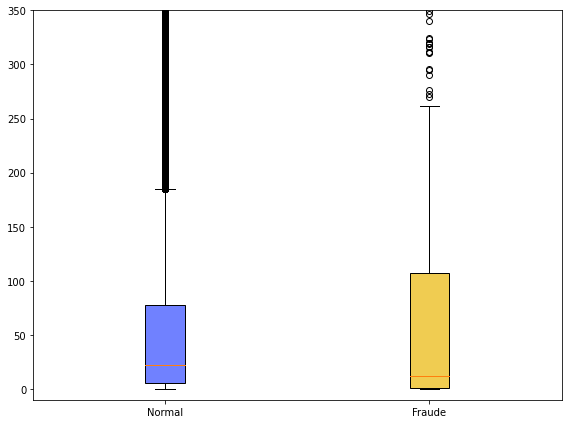

In [ ]:
#@title
ax, fig = plt.subplots(figsize=(8,6))

colors=['#7081FF','#F0CC51']

box = plt.boxplot([[df.Amount[df.Class==0]], df.Amount[df.Class==1]], 
                  labels=['Normal','Fraude'],patch_artist=True);

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.ylim(-10,350)

plt.tight_layout()

Describe para transações normais.

Foram filtradas transações abaixo de 1000, que correspondem a cerca de 99% das transações normais.

`A média dos valores das transações é de 70,09 enquanto a mediana é de 21,18.`

In [ ]:
#@title
#filtrar transações normais e com valores inferiores a 1000
df[(df.Class == 0) & (df.Amount < 1000)]['Amount'].describe()

count    239040.000000
mean         70.090839
std         126.632557
min           0.000000
25%           5.490000
50%          21.180000
75%          74.900000
max         999.900000
Name: Amount, dtype: float64

Describe para transações fraudulentas

Foram filtradas transações abaixo de 1000, que correspondem a cerca de 98% das transações normais.

`A média dos valores das transações é de 98,95 enquanto a mediana é de 9,99.`

In [ ]:
#@title
#filtrar transações fraudulentas e com valores inferiores a 1000
df[(df.Class == 1) & (df.Amount < 1000)]['Amount'].describe()

count    409.000000
mean      98.959169
std      175.214898
min        0.000000
25%        1.000000
50%        9.990000
75%      104.000000
max      996.270000
Name: Amount, dtype: float64

###d - Gráfico de Densidade

O gráfico de densidade é muito útil para compararmos as distribuições de cada variável para cada classe e ver quais são as mais importantes para detecção de anomalias.

O que se procura nesse tipo de visualização são distribuições que diferem uma da outra, permitindo identificar fraudes mais facilmente. Por exemplo, as variáveis `V11`, `V12` e `V18` são bem distintas para transações fraudulentas e e normais.

Por outro lado, variáveis como `V13` e `V15` e `V26` são muito similares, apresentando aproximadamente o mesmo comportamento para ambas as transações.


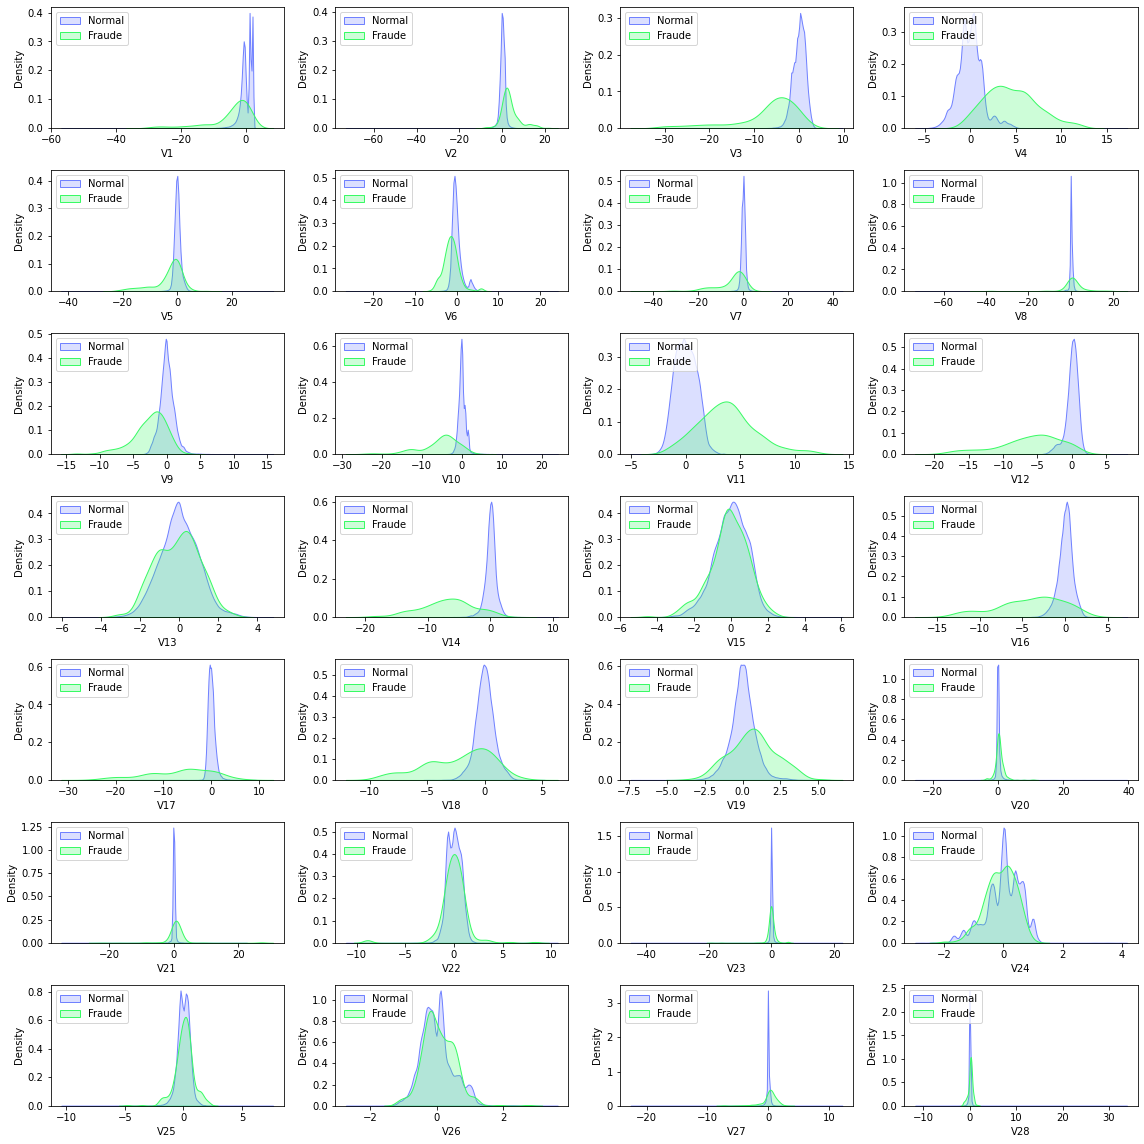

In [ ]:
#@title
colunas = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(colunas)
df_class_normal = df[df.Class == 0]
df_class_fraude = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(16,16))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

i = 0
for col in colunas:
  i +=1 # i=i+1 > https://www.guj.com.br/t/diferenca-entre-os-operadores-e/54288
  plt.subplot(7,4,i)
  sns.kdeplot(df_class_normal[col], label="Normal", shade=True, color='#7081FF')
  sns.kdeplot(df_class_fraude[col], label="Fraude", shade=True, color='#39FA65')
  plt.legend(loc='upper left')  

plt.tight_layout()  

## 1.5 - Observações
Após executada a análise exploratória, temos algumas observações:

*   O *dataset* é muito desbalanceado. Apenas 0,17% do dataset corresponde a transações fraudulentas;
*   Não foram encontrados valores nulos no *dataset*.
*   As variáveis `Amount` e `Time` apresentam valores zerados. Na primeira versão do código eu havias as excluída, mas nesta versão eu as mantive e tivemos um aumento de 3% na detecção de fraudes.
*   Uma vez que a PCA é sensível à escala das variáveis, assume-se a premissa que as features originais foram padronizadas.


# 2 - Preparação dos dados

Nesta etapa os dados são tratados para serem utilizados nos modelos de machine learning.

*   Padronizar as `features` `Amount` e `Time`, pois estão em grandezas distintas;
*   Dividir o dataset em `train` e `test`;
*   Balanceamento das classes.



##2.1 Padronização `Time` e `Amount`

Para esta etapa o método `StandardScaler` é utilizado, padronizando as features zerando a média e tornando o desvio padrão igual a 1. O método é indicado para `features` com outliers.

In [ ]:
#@title
df_clean = df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1,1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1,1))

df_clean.drop(['Time','Amount'], axis=1, inplace=True)
df_clean.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.246341,-1.997399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346945,-1.997399
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.171178,-1.997378
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140872,-1.997378
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075195,-1.997357


##2.2 Divisão do `dataset` em `train` e `validation`

Esta etapa deve ser feita antes do balanceamento, caso contrário não teremos parâmetros para conferir se o balanceamento foi adequado.

O `stratify=y` é utiliado para que os conjuntos de treino e teste tenham a mesma quantidade de classes proporcionalmente. 

Ex: se tenho 25% dos valores = 0 e 75% dos valores =1, o `stratify=y` garante que minha divisão aleatória terá essa mesma proporção.

    A target feature é a Class (y), a variável que buscamos prever.
    Já as outras features são nosso X.

Também pode-se usar `train_test_split(x, y, test_size=0.25, random_state=0)` no lugar do stratfy e shuffle. `O random_state` irá pegar itens no aleatório de acordo com a semente que utilizarmos. Essa semente permite recuperar os mesmos dados sempre que necessário.

Já o `test_size` indica o tamanho do nosso teste, nesse exemplo é 25%, ou seja, no início do estudo reservamos 15% para testar o modelo de melhor desempenho ao final das análises, restando 85% do `dataset` original que agora é dividido em `train` e `validation`.

In [ ]:
#@title
X = df_clean.drop('Class', axis=1)
y = df['Class']

#X_train, X_val, y_train, y_val = train_test_split(X,y, stratify=y, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.25, random_state=0)

print(f'O treino possui {(len(X_train))/len(df_clean)*100}% das entradas')
print(f'O teste possui {(len(X_val))/len(df_clean)*100}% das entradas')

O treino possui 74.99979346182761% das entradas
O teste possui 25.000206538172385% das entradas


##2.3 Balanceamento dos Dados

São testadas duas técnicas de balanceamento:

**Oversampling**: São geradas cópias das entradas da classe minoritária para equilibrar com a classe majoritária.

**Undersampling**: Entradas da classe majoritária são excluídas para balancear com a classe minoritária.

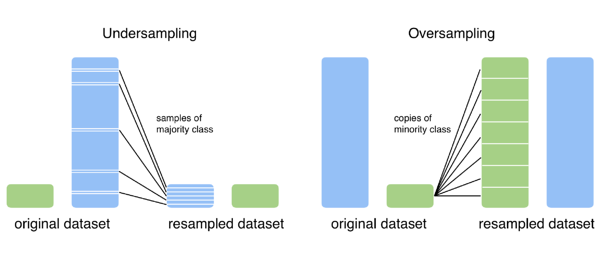

[fonte](https://blog.strands.com/unbalanced-datasets)

###a - Undersampling

0    319
1    319
Name: Class, dtype: int64



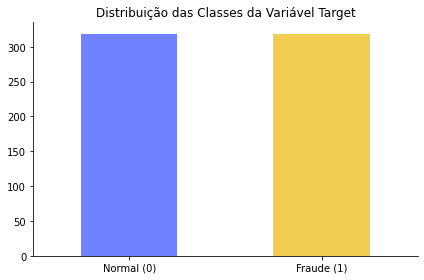

In [ ]:
#@title
#undersampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

#ver o balanceamento das classes
print(f'{pd.Series(y_rus).value_counts()}\n')

#plot
fig, ax = plt.subplots(figsize=(6,4))
pd.Series(y_rus).value_counts().plot(kind='bar', ax=ax, color=cores); #ou> sns.countplot(y_rus, palette=cores);

ax.set_title('Distribuição das Classes da Variável Target')
ax.set_ylabel('')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xticks([0, 1], ['Normal (0)', 'Fraude (1)'],rotation='horizontal')
plt.tight_layout()

### b - Oversampling

0    181245
1    181245
Name: Class, dtype: int64



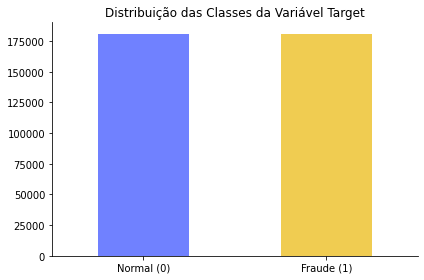

In [ ]:
#@title
#undersampling
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)

#ver o balanceamento das classes
print(f'{pd.Series(y_ros).value_counts()}\n')

#plot
fig, ax = plt.subplots(figsize=(6,4))
pd.Series(y_ros).value_counts().plot(kind='bar', ax=ax, color=cores); #ou> sns.countplot(y_rus, palette=cores);

ax.set_title('Distribuição das Classes da Variável Target')
ax.set_ylabel('')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xticks([0, 1], ['Normal (0)', 'Fraude (1)'],rotation='horizontal')
plt.tight_layout()

### c - Matriz de Correlação

Após os dados serem balanceados, utilizamos a matriz de correlação para identificar variáveis que estão mais relacionadas com as outras.

Observe que para os dados sem balanceamento, não temos informação relevante. Já com os dados balanceados temos uma diferença notável, e tanto no over quanto no undersampling tivemos uma relação parecida.

Desta forma, é possível notar a importância do balanceamento dos dados.



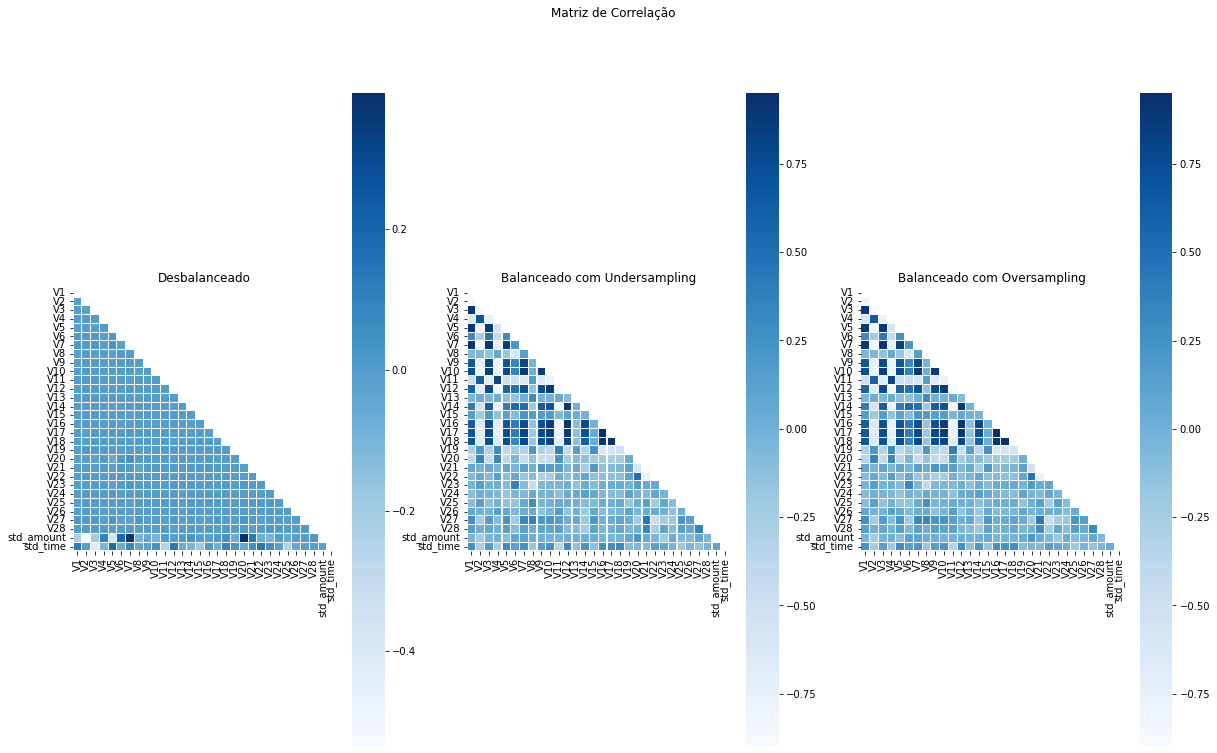

In [ ]:
#@title
#https://seaborn.pydata.org/tutorial/color_palettes.html
corr = X_train.corr()
corr_rus = X_rus.corr()
corr_ros = X_ros.corr()
mascara = np.triu(corr)
mascara_rus = np.triu(corr_rus)
mascara_ros = np.triu(corr_ros)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,12))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, mask=mascara,
            linewidths=.1, cmap="Blues", ax=ax[0], square=True)
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr_rus.columns, mask=mascara_rus,
            linewidths=.1, cmap="Blues", ax=ax[1], square=True)
ax[1].set_title('Balanceado com Undersampling')

sns.heatmap(corr_ros, xticklabels=corr_ros.columns, mask=mascara_ros,
            linewidths=.1, cmap="Blues", ax=ax[2], square=True)
ax[2].set_title('Balanceado com Oversampling')

plt.show()

#3 - Modelos de Machine Learning

São testados alguns modelos para encontrarmos a melhor opção para estes tipos de dados. Temos os seguintes modelos e variações:


*   Regressão Logística com os dados sem balanceamento
*   Regressão Logística Undersampling
*   Regressão Logística Oversampling
*   Árvore de Decisão com os dados sem balanceamento
*   Árvore de Decisão Undersampling
*   Árvore de Decisão Oversampling


A **regressão logística** é um modelo estatístico usado para determinar a probabilidade de um evento acontecer. Ele mostra a relação entre os recursos e, em seguida, calcula a probabilidade de um determinado resultado.

A regressão logística é usada no aprendizado de máquina (ML) para ajudar a criar previsões precisas. É semelhante à regressão linear, exceto que, em vez de um resultado gráfico, a variável de destino é binária; o valor é 1 ou 0.

Fonte: [1](https://www.tibco.com/pt-br/reference-center/what-is-logistic-regression#:~:text=A%20regress%C3%A3o%20log%C3%ADstica%20%C3%A9%20um,ajudar%20a%20criar%20previs%C3%B5es%20precisas.)

A **árvore de decisão** é um dos métodos mais comuns do aprendizado de máquina (ML). Pode ser utilizado para prever dados discretos ou numericos. É composta por perguntas e respostas booleanas, sendo possível classificar uma variável de acordo com o conjunto de respostas obtidas pelo conjunto de perguntas formuladas.

Fonte: [2](https://www.digitalhouse.com/br/blog/arvore-de-decisao/)

Utilizaremos como verificador a **matriz de confusão**. A Matriz de Confusão é uma tabela onde facilmente identificamos todos os quatro tipos de classificação do modelo de classificação binário (isto é, com apenas dois valores distintos na variável resposta). Com ela, facilmente podemos calcular valores como acurácia, precision, recall, etc. 


*   `Verdadeiro positivo (TP)`: exemplo: quando a transação é normal e o modelo classifica como normal;
*   `Falso positivo (FP)`: exemplo: quando a transação é normal, mas o modelo classifica como fraude;
*   `Falso negativo (FN)`: exemplo: quando a transação é fraudulenta e o modelo classifica como normal;
*   `Verdadeiro negativo (TN)`: exemplo: quando a transação é fraudulenta e o modelo classifica como fraude.

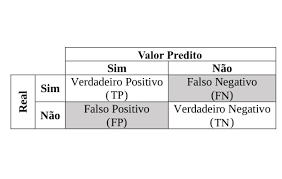


**Métricas:**


*   `Acurácia`: é a proporção de acertos do modelo. Para calculá-la, pega-se o número total de observações que o modelo acertou e divide-se pelo número total de observações que o modelo previu;
*   `Precision`: de todas as classificações de classe Positivo que o modelo fez, quantas estão corretas;
*   `Recall`: é a proporção de casos Positivos que foram identificados corretamente.
*   `F1-score`: é a média harmônica entre `precision` e `recall`;
*   `ROC AUC`: ROC é uma curva de probabilidade, criada traçando a taxa TP contra a taxa FN. Já o AUC representa o grau ou medida de separabilidade. Quanto maior a AUC, melhor o modelo vai distinguir entre transações fraudulentas e normais.

Fonte: [3](https://ajuda.datarisk.io/knowledge/o-que-%C3%A9-matriz-de-confus%C3%A3o), [4](https://vitorborbarodrigues.medium.com/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c), [5](https://medium.com/@eam.avelar/o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-2e2c4112033d), [6](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772)




## 3.1 Regressão Logística sem balanceamento

Utilizamos o dataset sem balanceamento para ilustrar o seu resultado e poder comprar com os resultados balanceados.

Podemos observar que tivemos uma acurácia de 99,9%, um `AUC` de 0.8282 e um `Recall` de [0.9999, 0.6566] , entretanto fomos capazes de prever apenas 66% das fraudes, o que torna o modelo ruim para a tomada de decisão.

O resultado era esperado, tendo em vista que estamos trabalhando com dados não balanceados.

[Documentação](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
#@title
# instanciar e treinar o modelo
modelLR = LogisticRegression()
modelLR.fit(X_train, y_train)

# fazer as previsões em cima dos dados de teste
y_pred = modelLR.predict(X_val)
y_proba = modelLR.predict_proba(X_val) #probabilidade da classe

Relatório de classificação:
               precision    recall  f1-score   support

           0     0.9994    0.9999    0.9997     60423
           1     0.8904    0.6566    0.7558        99

    accuracy                         0.9993     60522
   macro avg     0.9449    0.8282    0.8777     60522
weighted avg     0.9993    0.9993    0.9993     60522

Acurácia: 0.9993

AUC: 0.8282



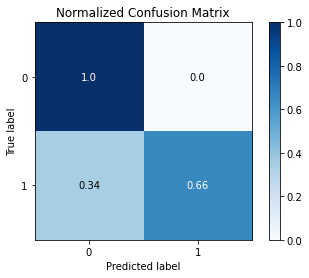

In [ ]:
#@title
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True, cmap='Blues')

# imprimir relatório de classificação
print(f'Relatório de classificação:\n {classification_report(y_val, y_pred, digits=4)}')

# imprimir a acurácia do modelo
print(f'Acurácia: {round(accuracy_score(y_val, y_pred),4)}\n')

# imprimir a área sob da curva
print(f'AUC: {round(roc_auc_score(y_val, y_pred),4)}\n')

##3.2 Regressão Logística com Oversampling

Dataset balanceado com o overrsampling, onde são geradas cópias das entradas da classe minoritária para equilibrar com a classe marjoritária.

A acurácia foi um pouco menor do que os dados balanceados ficando em 0.9742, entretanto a `AUC` e a capacidade prever fraudes aumentou para 0.9518 e 93% respectivamente. `Recall` de [0.9739, 0.9293].


In [ ]:
#@title
# instanciar e treinar o modelo
model_LR_ros = LogisticRegression()
model_LR_ros.fit(X_ros, y_ros)

# fazer as previsões em cima dos dados de teste
y_pred_ros = model_LR_ros.predict(X_val)
y_proba_ros = model_LR_ros.predict_proba(X_val) ##probabilidade da classe

Relatório de classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9746    0.9871     60423
           1     0.0566    0.9293    0.1067        99

    accuracy                         0.9745     60522
   macro avg     0.5282    0.9520    0.5469     60522
weighted avg     0.9983    0.9745    0.9856     60522

Acurácia: 0.9745

AUC: 0.952



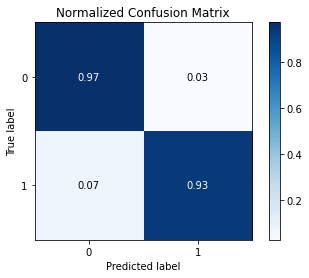

In [ ]:
#@title
skplt.metrics.plot_confusion_matrix(y_val, y_pred_ros, normalize=True, cmap='Blues')

# imprimir relatório de classificação
print(f'Relatório de classificação:\n {classification_report(y_val, y_pred_ros, digits=4)}')

# imprimir a acurácia do modelo
print(f'Acurácia: {round(accuracy_score(y_val, y_pred_ros),4)}\n')

# imprimir a área sob da curva
print(f'AUC: {round(roc_auc_score(y_val, y_pred_ros),4)}\n')

##3.3 Regressão Logística com undersampling 

Dataset balanceado com o undersampling, onde entradas da classe majoritária são excluídas para balancear com a classe minoritária.

Os dados ficaram bem próximos aos dados com oversampling, entretanto estão levemente piores com uma acurácia de 0.9532, `AUC` de 0.9463 e capacidade de prever fraudes de 94%. `Recall` de [0.9425, 0.9495]

In [ ]:
#@title
# instanciar e treinar o modelo
model_LR_rus = LogisticRegression()  #(penalty='l2', C=0.1, solver='liblinear')
model_LR_rus.fit(X_rus, y_rus)

# fazer as previsões em cima dos dados de teste
y_pred_rus = model_LR_rus.predict(X_val)
y_proba_rus = model_LR_rus.predict_proba(X_val) ##probabilidade da classe

Relatório de classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9536    0.9762     60423
           1     0.0321    0.9394    0.0621        99

    accuracy                         0.9536     60522
   macro avg     0.5160    0.9465    0.5191     60522
weighted avg     0.9983    0.9536    0.9747     60522

Acurácia: 0.9536

AUC: 0.9465



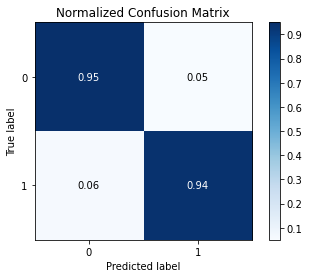

In [ ]:
#@title
skplt.metrics.plot_confusion_matrix(y_val, y_pred_rus, normalize=True, cmap='Blues')

# imprimir relatório de classificação
print(f'Relatório de classificação:\n {classification_report(y_val, y_pred_rus, digits=4)}')

# imprimir a acurácia do modelo
print(f'Acurácia: {round(accuracy_score(y_val, y_pred_rus),4)}\n')

# imprimir a área sob da curva
print(f'AUC: {round(roc_auc_score(y_val, y_pred_rus),4)}\n')

## 3.4 Decision Tree sem balanceamento

Como esperado, os resultados não foram bons devido a falta de balanceamento. O curioso é que ficaram melhores do que a regressão logística com dados não balanceados.

Ao fim é apresentada a nossa árvore, a partir de um dot e desenhando ele utilizando as bibliotecas listadas no código.


[Documentação](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)


In [ ]:
#@title
# instanciar e treinar o modelo
model_DT = DecisionTreeClassifier(min_samples_split=5, max_depth=4, criterion='entropy')
model_DT.fit(X_train, y_train)

# fazer as previsões em cima dos dados de teste
y_train_DT = model_DT.predict(X_val)
y_proba_DT = model_DT.predict_proba(X_val)            

Relatório de classificação:
               precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     60423
           1     0.8846    0.6970    0.7797        99

    accuracy                         0.9994     60522
   macro avg     0.9421    0.8484    0.8897     60522
weighted avg     0.9993    0.9994    0.9993     60522

Acurácia: 0.9994

AUC: 0.8484



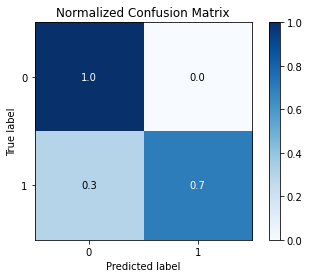

In [ ]:
#@title
skplt.metrics.plot_confusion_matrix(y_val, y_train_DT, normalize=True, cmap='Blues')

# imprimir relatório de classificação
print(f'Relatório de classificação:\n {classification_report(y_val, y_train_DT, digits=4)}')

# imprimir a acurácia do modelo
print(f'Acurácia: {round(accuracy_score(y_val, y_train_DT),4)}\n')

# imprimir a área sob da curva
print(f'AUC: {round(roc_auc_score(y_val, y_train_DT),4)}\n')

É possível oberservar a divisão de cada classe e observar que os samples estão desbalanceados. Cada nó tem suas informações referentes ao cálculo executado. O gráfico ilustra qual variável está sendo usada e em qual condição para fazer a ramificação e inferir se é uma fraude ou não.

Inicia com a variável v17, que é uma das variáveis com maior distinção quando olhamos transações normais e fraudulentas. Na sequência, passa para as variáveis V12 e V14 que possuem uma distribuição similar à V17, e assim segue até as variáveis de menor importância.


Esta observação pode ser conferida no item 1.5d, onde foi plotado a densidade de cada variável.


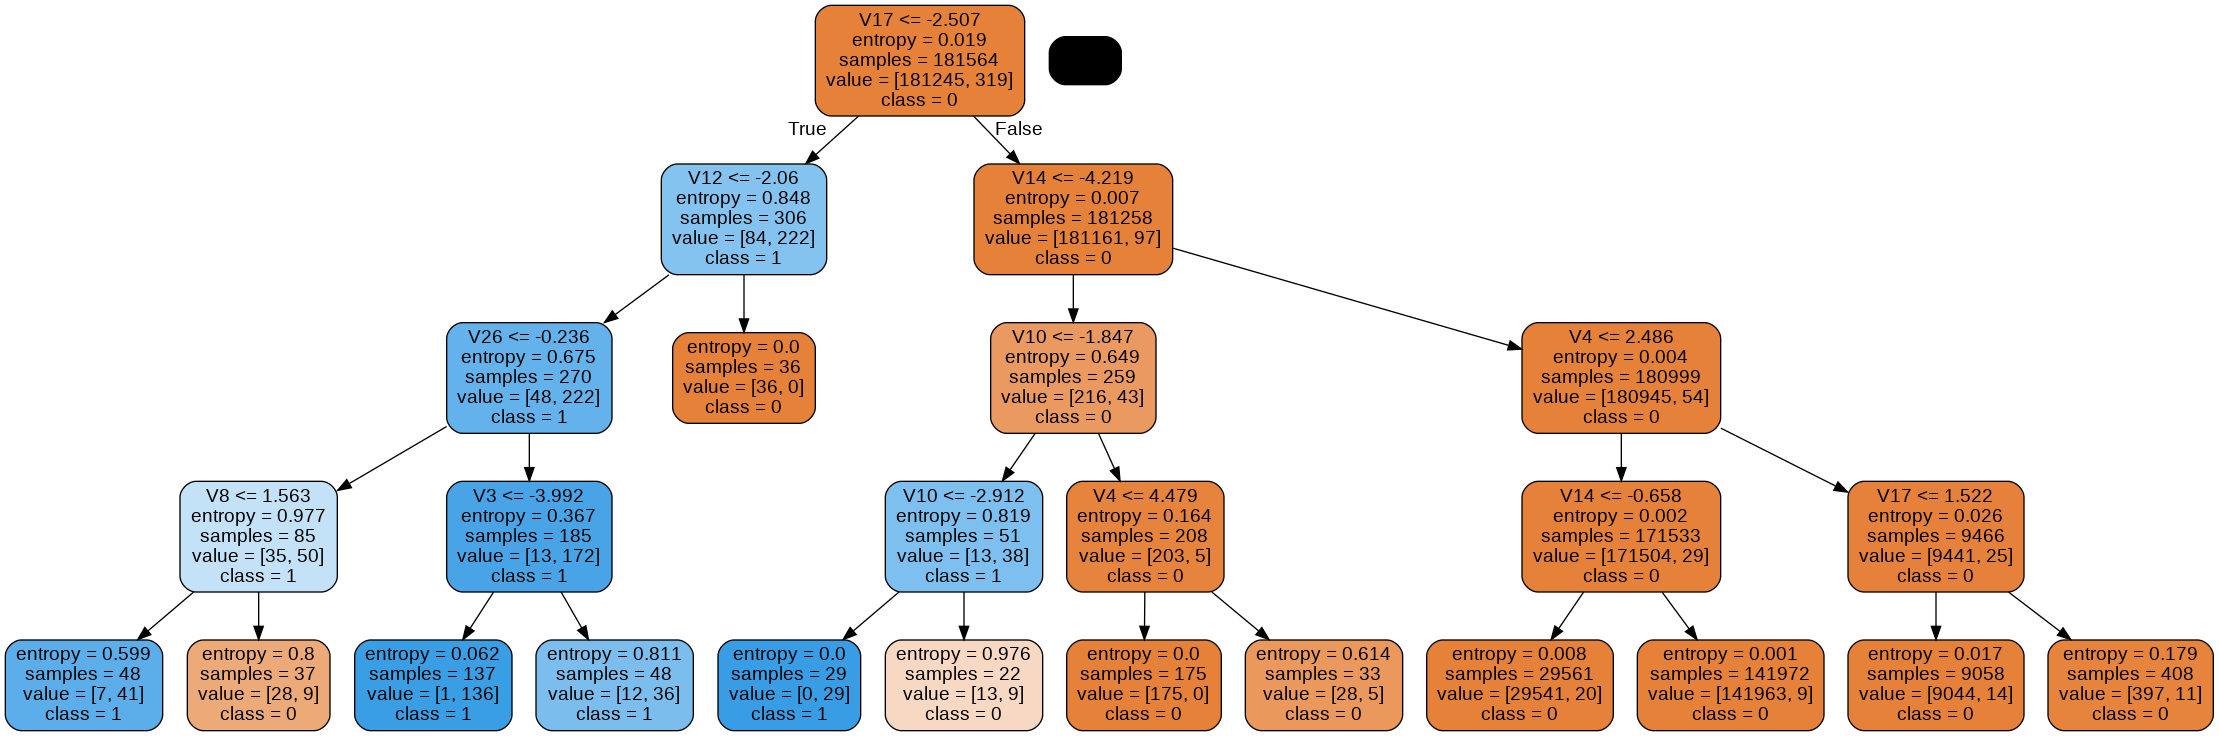

In [ ]:
#@title
# Gráfico da decision Tree
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# criar DOT 
dot = export_graphviz(model_DT, filled=True, rounded=True,
                      feature_names=X.columns, class_names=['0', '1'])

# plotar
graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())

## 3.5 Decision Tree com Oversampling

Os resultados melhoraram em relação aos dados não balanceados, mas ainda ficaram abaixo dos resultados da regressão logística com over e undersampling.

In [ ]:
#@title
# instanciar e treinar o modelo
model_DT_ros = DecisionTreeClassifier(min_samples_split=5, max_depth=4, criterion='entropy')
model_DT_ros.fit(X_ros, y_ros)

# fazer as previsões em cima dos dados de teste
y_train_DT_ros = model_DT_ros.predict(X_val)
y_proba_DT_ros = model_DT_ros.predict_proba(X_val)    

Relatório de classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9406    0.9693     60423
           1     0.0239    0.8889    0.0466        99

    accuracy                         0.9405     60522
   macro avg     0.5119    0.9147    0.5079     60522
weighted avg     0.9982    0.9405    0.9678     60522

Acurácia: 0.9405

AUC: 0.9147



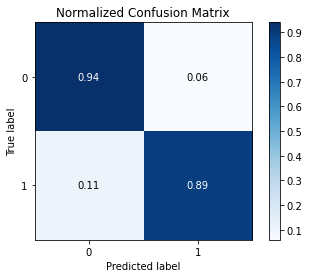

In [ ]:
#@title
skplt.metrics.plot_confusion_matrix(y_val, y_train_DT_ros , normalize=True, cmap='Blues')

# imprimir relatório de classificação
print(f'Relatório de classificação:\n {classification_report(y_val, y_train_DT_ros , digits=4)}')

# imprimir a acurácia do modelo
print(f'Acurácia: {round(accuracy_score(y_val, y_train_DT_ros ),4)}\n')

# imprimir a área sob da curva
print(f'AUC: {round(roc_auc_score(y_val, y_train_DT_ros ),4)}\n')

## 3.6 Decision Tree com Undersampling

Os resultados melhoraram em relação aos dados não balanceados, mas ainda ficaram abaixo dos resultados da regressão logística com over e undersampling.

In [ ]:
#@title
# instanciar e treinar o modelo
model_DT_rus = DecisionTreeClassifier(min_samples_split=5,max_depth=4, criterion='entropy')
model_DT_rus.fit(X_ros, y_ros)

# fazer as previsões em cima dos dados de teste
y_train_DT_rus = model_DT_rus.predict(X_val)
y_proba_DT_rus = model_DT_rus.predict_proba(X_val)    

Relatório de classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9406    0.9693     60423
           1     0.0239    0.8889    0.0466        99

    accuracy                         0.9405     60522
   macro avg     0.5119    0.9147    0.5079     60522
weighted avg     0.9982    0.9405    0.9678     60522

Acurácia: 0.9405

AUC: 0.9147



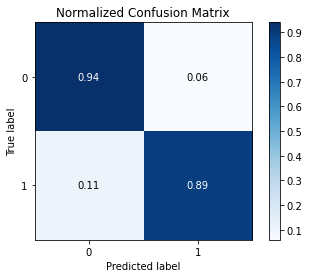

In [ ]:
#@title
skplt.metrics.plot_confusion_matrix(y_val, y_train_DT_rus , normalize=True, cmap='Blues')

# imprimir relatório de classificação
print(f'Relatório de classificação:\n {classification_report(y_val, y_train_DT_rus , digits=4)}')

# imprimir a acurácia do modelo
print(f'Acurácia: {round(accuracy_score(y_val, y_train_DT_rus ),4)}\n')

# imprimir a área sob da curva
print(f'AUC: {round(roc_auc_score(y_val, y_train_DT_rus ),4)}\n')

##3.7 Observações sobre os Resultados

Dentre os 6 testes realizados o que se mostrou melhor foi:



**Regressão logística com balanceamento oversampling** (`model_ros`)


    Acurácia de 0.9742 
    AUC de 0.9518 
    Capacidade de prever fraude de 93%.
    Recall [0.9739, 0,9293]





#4 - Avaliação do modelo com dados de teste

No início do projeto foi feita uma divisão do `dataset` em três partes, sendo uma de treino (train), uma de validação (test) e outra de teste (teste).

Após todas as etapas executadas, chegou o momento de descobrir o potencial deste modelo simplificado com os dados de teste.

O modelo treinado será testado com os dados de teste, mas é necessário deixar estes dados nas mesmas condições que o modelo espera.

Para isso, as colunas `Time` e `Amount` serão padronizadas. Não é necessário balancear os dados pois haveria perda.

Lembrando que o dataset de teste neste exemplo possui 15% do total de linhas do dataset original.





## 4.1 Tratamento dos dados

In [ ]:
#@title
#padronização das colunas Time e Amount no dataset teste
test_clean = df_teste.copy()

std_scaler = StandardScaler()
test_clean['std_amount'] = std_scaler.fit_transform(test_clean['Amount'].values.reshape(-1, 1))
test_clean['std_time'] = std_scaler.fit_transform(test_clean['Time'].values.reshape(-1, 1))

test_clean.drop(['Time','Amount'], axis=1, inplace=True)

test_clean.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,-0.177738,0.658372
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,-0.321945,1.320094
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,0.034666,1.219742
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,0.838765,-0.919236
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,-0.310490,-1.572827


##4.2 Previsão com Regressão Logística

O modelo que saiu melhor no treino foi regressão logística aplicada em dados balanceados com oversampling(`model_ros`), portanto utilizamos ele com os dados de teste.

Os resultados encontrados com dados de teste foram:

    Acurácia de 0.9755
    AUC de 0.9607 
    Capacidade de prever fraude de 95%.
    Recall [0.9750, 0.9459]

Valores bem próximos dos valores encontrados durante o treino.

In [ ]:
#@title
# separar variáveis entre X e y
X_test = test_clean.drop('Class', axis=1)
y_test = df_teste['Class']

# fazer as previsões em cima dos dados de teste
y_pred_teste = model_LR_ros.predict(X_test)
y_proba_teste = model_LR_ros.predict_proba(X_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     42647
           1     0.0630    0.9459    0.1181        74

    accuracy                         0.9755     42721
   macro avg     0.5315    0.9608    0.5529     42721
weighted avg     0.9983    0.9755    0.9861     42721

Acurácia: 0.9755

AUC: 0.9608



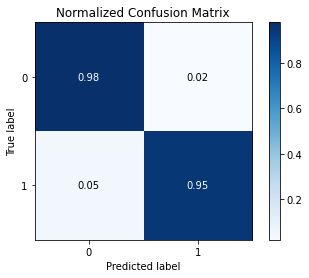

In [ ]:
#@title
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_teste, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_teste, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_teste)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_teste)))

# Conclusão

Por meio da análise e treino de modelos foi possível chegar à um resultado plausível para análise de detecção de fraudes utilizando o modelo de regressão logística com balanceamento oversampling.


    Acurácia de 0.9742 
    AUC de 0.9518 
    Capacidade de prever fraude de 93%.
    Recall [0.9739, 0,9293]

Obviamente, em um modelo em produção em uma grande instituição financeira estes resultados não seriam o bastante, pois por exemplo, podemos ter de 2 à 3% de transações normais identificadas como fraude (Falso Positivo), algo que no dia a dia seria um grande um problema, afinal grandes instituições chegam na casa de milhões de transações dia.

De toda forma, foi muito válido o estudo dessa base, pude entender mais sobre dados desbalanceados, transformados com PCA, matriz de confusão e modelos diferentes.

Para a próxima etapa, acredito ser necessário melhorar os parâmetros e hiperparâmetros, refinando assim o modelo de aprendizado de máquina.